Classification using SVM and K-Fold Kernals

In [17]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for easy visualization
y = iris.target

# Data Exploration
print("Features:", iris.feature_names[:2])
print("Classes:", iris.target_names)
print("Dataset shape:", X.shape)
print("Missing values per feature:", np.isnan(X).sum(axis=0))

Features: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 2)
Missing values per feature: [0 0]


There are no missing avlues in the dataset

In [33]:
# Lets explore the dataset in the form of tables

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].apply(lambda x: iris.target_names[x])

# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
# Data Preparation: Scaling features

from sklearn.preprocessing import StandardScaler
# Scaling the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Displaying the dataset after scaling

In [34]:
# Scaling the dataset's feature columns and re-creating a DataFrame to display scaled data
X_scaled_df = pd.DataFrame(data=X_scaled, columns=iris.feature_names[:2])

# Display the first few rows of the scaled dataset
X_scaled_df.head()

,sepal length (cm),sepal width (cm)
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201


In [23]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Divinding the dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Implementation of SVM

In [27]:
# SVM Implementation with various kernels
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Experimenting various Kernals
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='auto')
    svm_model.fit(X_train, y_train)
    svm_models[kernel] = svm_model

Evaluating K-Fold validation

In [28]:
# K-fold Cross-Validation
cv_scores = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for kernel, model in svm_models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv)
    cv_scores[kernel] = scores
    print(f"Kernel: {kernel}, Cross-validation Scores: {scores}, Average Score: {scores.mean()}")



Kernel: linear, Cross-validation Scores: [0.8        0.76666667 0.76666667 0.93333333 0.7       ], Average Score: 0.7933333333333333
Kernel: poly, Cross-validation Scores: [0.76666667 0.7        0.73333333 0.7        0.63333333], Average Score: 0.7066666666666668
Kernel: rbf, Cross-validation Scores: [0.83333333 0.76666667 0.73333333 0.9        0.7       ], Average Score: 0.7866666666666667
Kernel: sigmoid, Cross-validation Scores: [0.83333333 0.76666667 0.83333333 0.9        0.73333333], Average Score: 0.8133333333333332


In [29]:
# Plotting decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(title)
    plt.show()

Plotting all the Visualizations

Exploring the Evaluation Metrics

Metrics for Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



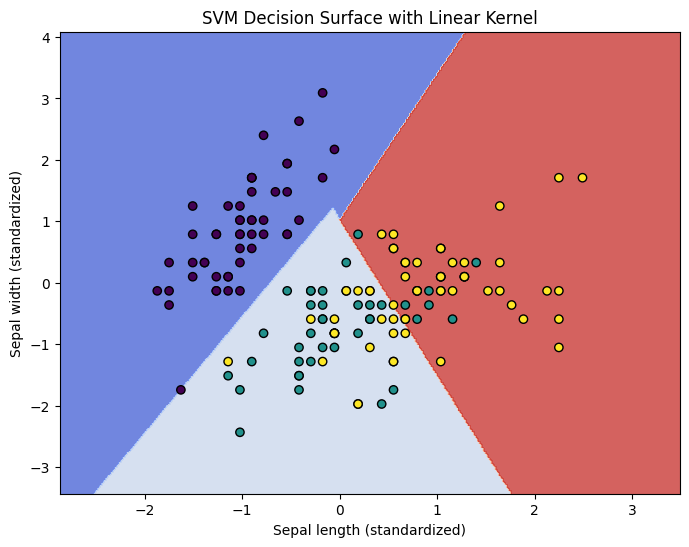

Metrics for Kernel: poly
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.45      1.00      0.62         9
           2       1.00      0.18      0.31        11

    accuracy                           0.63        30
   macro avg       0.82      0.66      0.61        30
weighted avg       0.84      0.63      0.60        30



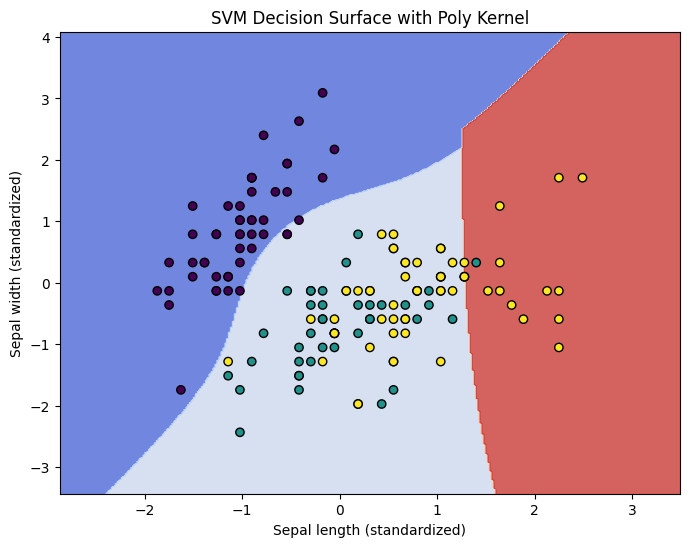

Metrics for Kernel: rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



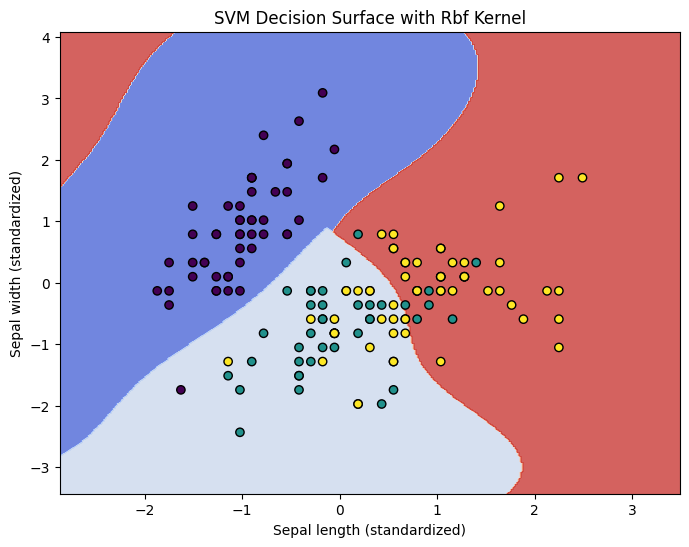

Metrics for Kernel: sigmoid
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.67      0.71         9
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



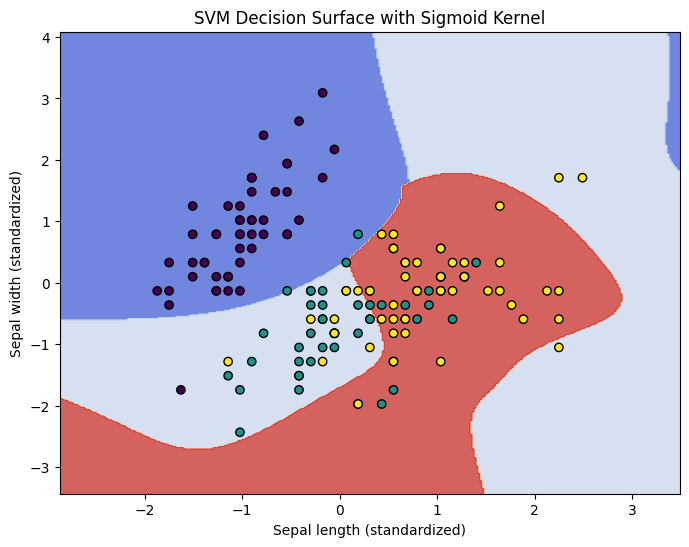

In [31]:
# Evaluating models and plotting decision boundaries
from sklearn.metrics import classification_report, confusion_matrix


for kernel, model in svm_models.items():
    y_pred = model.predict(X_test)
    print(f"Metrics for Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    plot_title = f"SVM Decision Surface with {kernel.capitalize()} Kernel"
    plot_decision_boundaries(X_scaled, y, model, plot_title)

Plotting the Confusion Matrix

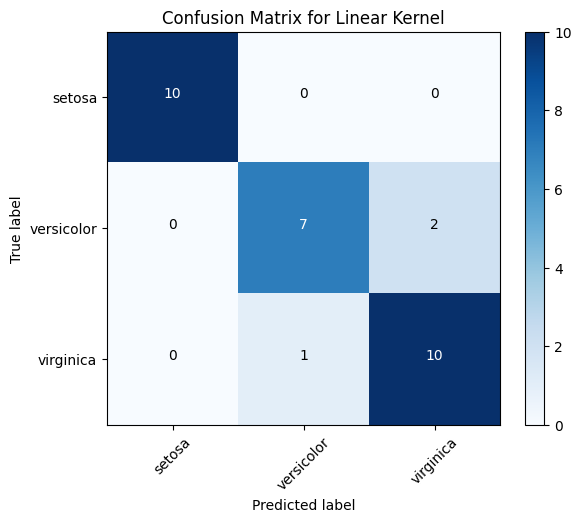

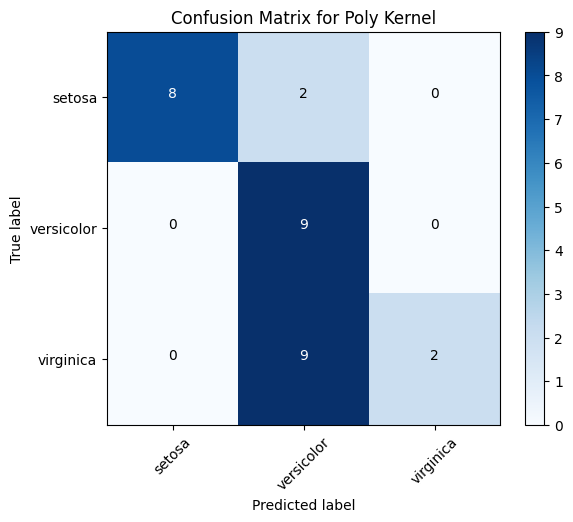

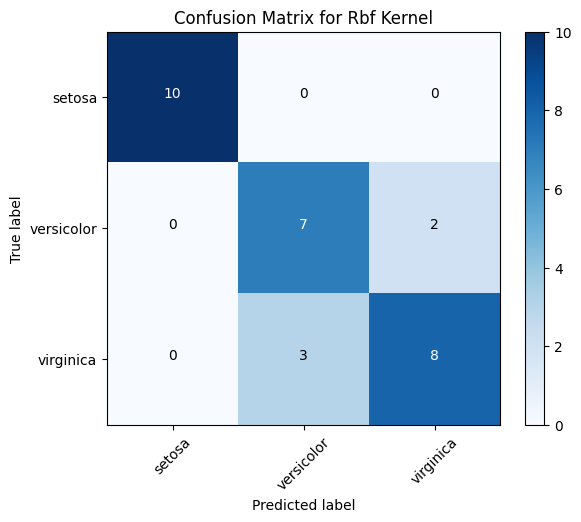

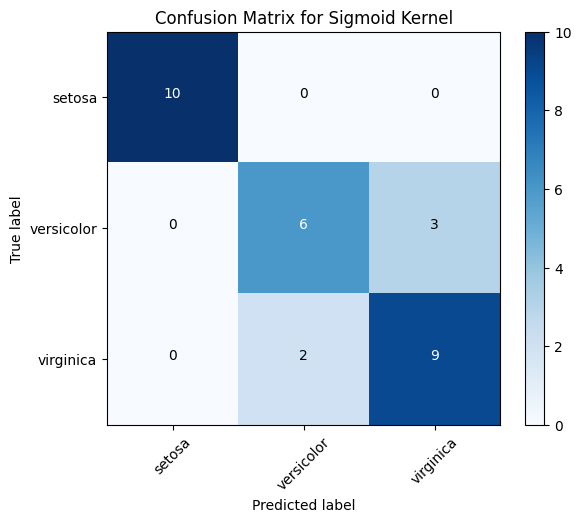

In [32]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Reusing previously defined `svm_models`, `X_test`, `y_test` to plot confusion matrices
for kernel, model in svm_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plot_confusion_matrix(cm, classes=iris.target_names,
                          title=f'Confusion Matrix for {kernel.capitalize()} Kernel')
    plt.show()
